In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

from tensorflow import keras
from tensorflow.keras import layers
data = pd.read_csv('/content/supply_chain_data.csv')
print("Shape:", data.shape)
data.head()


Shape: (100, 24)


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [ ]:
# Drop missing values
data = data.dropna()

# Handle Date column if present
if 'Date' in data.columns:
    data['Date'] = pd.to_datetime(data['Date'])
    data['Month'] = data['Date'].dt.month
    data['DayOfWeek'] = data['Date'].dt.dayofweek
    data['Quarter'] = data['Date'].dt.quarter
    data = data.drop(columns=['Date'])

# One-hot encode categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# One-hot encode if columns exist
for col in ['Promotion', 'Weather', 'EconomicIndicators']:
    if col in data.columns:
        data = pd.get_dummies(data, columns=[col], drop_first=True)

In [ ]:
# Inspect the columns of the DataFrame
print(data.columns)

# Assuming 'Number of products sold' is the target variable based on the data preview
target = 'Number of products sold'
features = data.drop(columns=[target])

# One-hot encode categorical columns in the features DataFrame
categorical_cols = features.select_dtypes(include=['object']).columns
features = pd.get_dummies(features, columns=categorical_cols, drop_first=True)

X = features
y = data[target]

Index(['Price', 'Availability', 'Number of products sold', 'Revenue generated',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping costs', 'Lead time',
       ...
       'Location_Delhi', 'Location_Kolkata', 'Location_Mumbai',
       'Inspection results_Pass', 'Inspection results_Pending',
       'Transportation modes_Rail', 'Transportation modes_Road',
       'Transportation modes_Sea', 'Routes_Route B', 'Routes_Route C'],
      dtype='object', length=136)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 226ms/step - loss: 299043.7188 - val_loss: 288381.9375
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 280025.2500 - val_loss: 287916.3438
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 278104.4062 - val_loss: 287472.8750
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 292120.8750 - val_loss: 287045.1875
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 303768.3750 - val_loss: 286606.5625
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 291278.9688 - val_loss: 286146.0625
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 280325.7500 - val_loss: 285655.5312
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 304851.0312 - val_loss: 285124.3750
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 303105.0000 - val_loss: 284537.0625
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 283928.1875 - val_loss: 283890.2812
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 295031.5938 - val_los

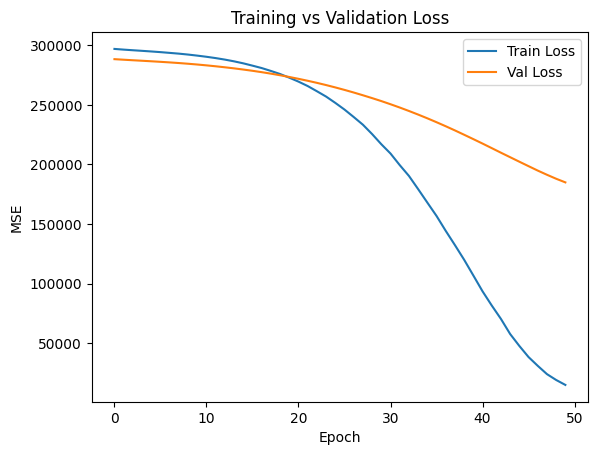

In [ ]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Mean Squared Error: 133590.34375


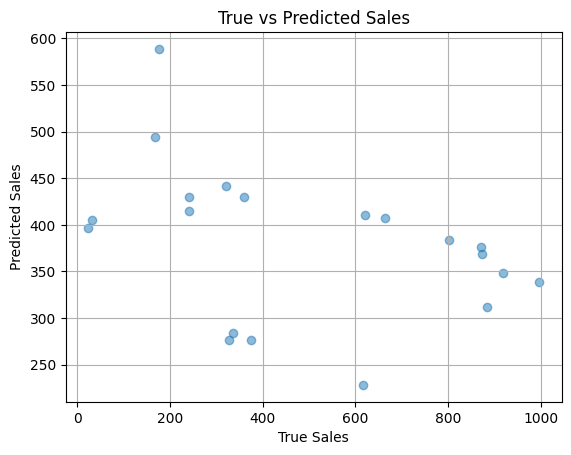

In [ ]:
predictions = model.predict(X_test_scaled).flatten()
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel("True Sales")
plt.ylabel("Predicted Sales")
plt.title("True vs Predicted Sales")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

model.save('demand_forecasting_model.h5')

# Load the model, explicitly providing custom objects
loaded_model = keras.models.load_model('demand_forecasting_model.h5', custom_objects={'mse': mean_squared_error})

In [ ]:
sample_input = np.array([X.iloc[0]])
sample_scaled = scaler.transform(sample_input)
predicted_sales = loaded_model.predict(sample_scaled)
print("Predicted Sales:", predicted_sales[0][0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Predicted Sales: 383.48975
